a = 24.228, b = 0.538, c = 0.051
R-squared: 0.993


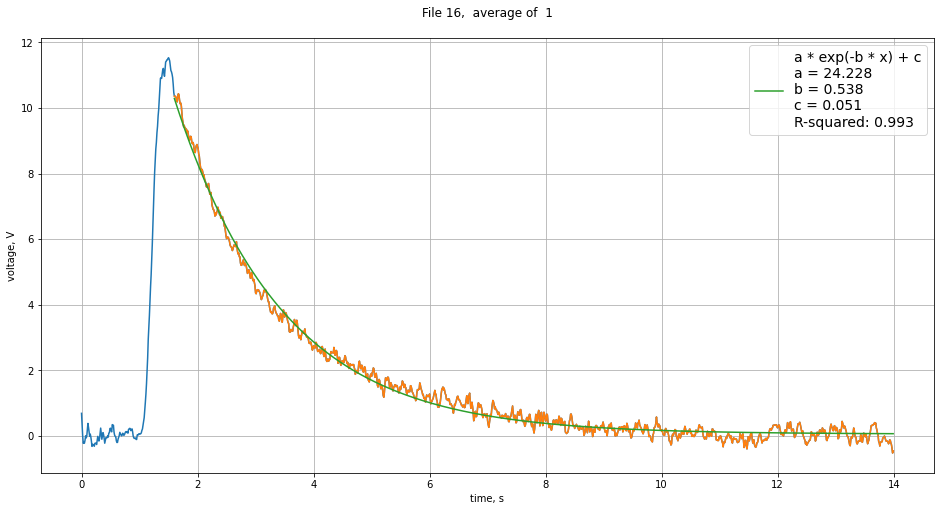

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats, optimize
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

filename = './approximation/16.asc'
left = 1.6
right = 12
time_resolution = 0.01

with open(filename, 'r', encoding='utf-8') as inf:
    title = inf.readline()
    v = [float(_.strip()) for _ in inf.readlines()]

left = int(left / time_resolution)
right = int(right / time_resolution)
n = len(v)
v = np.array(v)
t = np.linspace(0, (n - 1) * time_resolution, n)
y = v[left:right]
x = t[left:right]

popt, pcov = optimize.curve_fit(func, x, y, [1, 0, 0])
print(f'a = {popt[0]:.3f}, b = {popt[1]:.3f}, c = {popt[2]:.3f}')
fit = func(x, *popt)
r = stats.linregress(y, fit)
print(f'R-squared: {r.rvalue ** 2:.3f}')

fig, ax = plt.subplots()
ax.plot(t, v)
ax.plot(x, y)
ax.plot(x, fit, label=f'a * exp(-b * x) + c\na = {popt[0]:.3f}\nb = {popt[1]:.3f}\nc = {popt[2]:.3f}\nR-squared: {r.rvalue ** 2:.3f}')
fig.set_figwidth(16)
fig.set_figheight(8)
ax.set_xlabel('time, s')
ax.set_ylabel('voltage, V')
ax.set_title(title)
ax.legend(prop={"size":14})
ax.grid()